<a href="https://colab.research.google.com/github/VelasquezE/ML4Sci_2025-II/blob/main/Module2/clasficadorTexto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clasificador de texto**

# 0. Importar las librerías necesarias

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

In [46]:
# Personalización gráficas

sns.set_style("darkgrid")

custom_rc = {
    "xtick.bottom": True,
    "ytick.left": True,
    "xtick.direction": "out",
    "ytick.direction": "out",
    "axes.edgecolor": "black",
    "grid.color": "#bbbbbb",
    "grid.linestyle": "dashed",
    "axes.grid": True,
    "axes.spines.top": True,
    "axes.spines.right": False,
    "axes.spines.left": False,
    "axes.spines.bottom": True
}
sns.set_context("notebook")
sns.set_style("darkgrid", rc = custom_rc)

# 1. Cargar los datos de entrenamiento

Se descargan los archivos csv de un repositorio de GitHub.
Luego, se carga el contenido en un DataFrame de pandas para su posterior análisis.

In [47]:
def get_data(name):
    """
    Descarga un archivo csv dado el nombre del archivo.
    Carga los datos en un DataFrame.

    Returns:
        pandas.DataFrame: Datos extraídos.
    """
    base_url = "https://raw.githubusercontent.com/VelasquezE/ML4Sci_2025-II/refs/heads/main/Module2/"
    url = base_url + name
    output_file = name
    !wget -O {output_file} {url}

    data = pd.read_csv(output_file)
    return data

In [48]:
file_name = "exc_03_train.csv"

data = get_data(file_name)

--2025-11-26 14:42:53--  https://raw.githubusercontent.com/VelasquezE/ML4Sci_2025-II/refs/heads/main/Module2/exc_03_train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1628989 (1.6M) [text/plain]
Saving to: ‘exc_03_train.csv’

exc_03_train.csv    100%[===================>]   1.55M  --.-KB/s    in 0.008s  

2025-11-26 14:42:53 (193 MB/s) - ‘exc_03_train.csv’ saved [1628989/1628989]



In [49]:
data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8695 entries, 0 to 8694
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Id       8695 non-null   object
 1   Comment  8695 non-null   object
 2   Topic    8695 non-null   object
dtypes: object(3)
memory usage: 203.9+ KB


# 2. Pre-procesamiento de los datos

Se empieza limpiendo los datos. Se eliminan los caracteres especiales (números, puntuación, símbolos), se dejan las palabras en minúscula, la lematización convierte una palabra a su forma base (cars -> car), tokeniza (genera una lista de palabras), quita las "stopwords" es decir "the, a, an, in, on, with...".

In [ ]:
nltk.download("all")

In [58]:
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
  text = re.sub('[^a-zA-Z]', ' ', text)
  text = text.lower()
  words = text.split()
  words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]

  return " ".join(words)

data['clean_comment'] = data["Comment"].apply(clean_text)

data.head()

,Id,Comment,Topic,clean_text,clean_comment
0,0x840,A few things. You might have negative- frequen...,Biology,thing might negative frequency dependent selec...,thing might negative frequency dependent selec...
1,0xbf0,Is it so hard to believe that there exist part...,Physics,hard believe exist particular detect anything ...,hard believe exist particular detect anything ...
2,0x1dfc,There are bees,Biology,bee,bee
3,0xc7e,I'm a medication technician. And that's alot o...,Biology,medication technician alot drug liver probably...,medication technician alot drug liver probably...
4,0xbba,Cesium is such a pretty metal.,Chemistry,cesium pretty metal,cesium pretty metal


Se empieza dividiendo los datos en un dataset de entrenamiento (80%) y otro de prueba (20%).

In [53]:
seed = 19

X_train, X_test, y_train, y_test = train_test_split(data["clean_comment"], data["Topic"], test_size=0.2, random_state=seed)

# **Mutinomial Naive Bayes**

Se empieza probando el método explicado en clase.

Primero, se vectorizan los datos. Es decir, se convierte el texto en un vector de "tokens"; en este caso, palabras.

In [54]:
vectorizer = CountVectorizer()

X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

Se entrena el modelo usando `MultinomialNB`.




In [55]:
model = MultinomialNB()
model.fit(X_train_vectorized, y_train)

MultinomialNB()

Y se evalua el modelo usando las métricas de `accuracy_score()`, y la matriz de confusión.

Accuracy on training: 74.06555491661875%


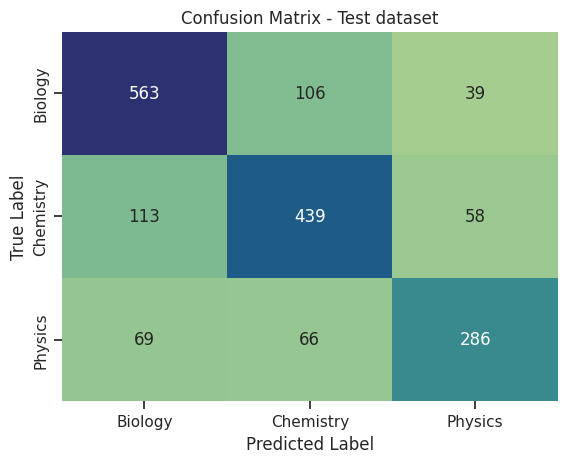

In [59]:
y_pred = model.predict(X_test_vectorized)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on training: {accuracy *100}%')

conf_matrix = confusion_matrix(y_test, y_pred)
class_labels = np.unique(y_train)

sns.heatmap(conf_matrix,
            annot=True,
            fmt='d',
            cmap='crest',
            cbar = False,
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.title('Confusion Matrix - Test dataset')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()